### *Задание*

-----

<br>

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source). Таким образом после вашего анализа, я хочу увидеть небольшое описание нашего целевого клиента с соответствующими визуализациями и статистическими выводами, что мы и прошли с вами на лекции. Используйте по максимуму ваши знания работы с датасетом (обработка, предобработка и приведение его к виду с которым можно работать).

<br>

Критерии оценки задания:

1. Правильность и **подкрепленность выводами вашего статистического анализа** (используйте весь доступный вам инструментарий, какой - решите самостоятельно).
2. Корректность использования графиков при графическом анализе. Не надо визуализировать все, что у вас есть в датасете, **подумайте какие признаки и какие взамосвязи можно и нужно показать, какие распределения важно отобразить.**
3. Оформление и **эффективное использование кода.**

**Максимальный балл за решение текущего задания 5 баллов.**

Покажите, как вы можете самостоятельно работать с данными и ваше аналитическое мышление, подкрепленное цифрами и соответствующими выводами.
Удачи.

<div align="center"> <font size="5"> <b>Data cleaning and reprocessing</b> </div>

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns
import missingno as msno
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 30)


In [101]:
data = pd.read_csv('clients.csv')

In [102]:
data.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,Entity,Name,Surname,Age at time of purchase,Age Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,Individual,Madalyn,Mercer,19.0,18-25,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,Individual,Lara,Carrillo,22.0,18-25,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,Individual,Donavan,Flowers,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,Individual,Darien,Dorsey,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,Individual,Alessandra,Perry,25.0,18-25,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

In [104]:
data.dtypes

ID                           int64
Building                     int64
Year of sale                 int64
Month of sale                int64
Type of property            object
Property number              int64
Area (ft.)                 float64
Price                       object
Status                      object
Customer ID                 object
Entity                      object
Name                        object
Surname                     object
Age at time of purchase    float64
Age Interval                object
Y                          float64
M                          float64
D                          float64
Gender                      object
Country                     object
State                       object
Purpose                     object
Deal satisfaction            int64
Mortgage                    object
Source                      object
dtype: object

In [105]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,195.0,2591.425641,1244.617996,1002.00,2003.50,2054.00,3048.50,5051.0
Building,195.0,2.564103,1.243434,1.00,2.00,2.00,3.00,5.0
Year of sale,195.0,2006.333333,1.072941,2004.00,2006.00,2007.00,2007.00,2010.0
Month of sale,195.0,7.271795,3.378674,1.00,4.00,8.00,10.00,12.0
Property number,195.0,27.328205,14.830832,1.00,15.00,27.00,39.00,59.0
Area (ft.),195.0,899.867128,261.489550,410.71,739.86,785.48,1075.46,1942.5
Age at time of purchase,178.0,46.151685,12.841692,19.00,37.00,45.00,55.00,76.0
Y,178.0,1960.325843,12.835575,1931.00,1950.25,1962.00,1969.75,1986.0
M,178.0,6.752809,3.450312,1.00,4.00,6.00,9.75,15.0
D,178.0,15.449438,8.457285,1.00,8.00,15.00,23.75,31.0


In [106]:
data.columns

Index(['ID', 'Building', 'Year of sale', 'Month of sale', 'Type of property',
       'Property number', 'Area (ft.)', 'Price', 'Status', 'Customer ID',
       'Entity', 'Name', 'Surname', 'Age at time of purchase', 'Age Interval ',
       'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')

In [107]:
data['Status'].value_counts()

Status
 Sold     195
Name: count, dtype: int64

In [108]:
del data['Status']

In [109]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in data.columns if data[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
        missing_percent[col] = per
    return missing_percent

In [110]:
_ = get_numerical_summary(data)

Age at time of purchase : 17 (8.718%)
Age Interval  : 17 (8.718%)
Y : 17 (8.718%)
M : 17 (8.718%)
D : 17 (8.718%)
Gender : 17 (8.718%)
State : 14 (7.179%)


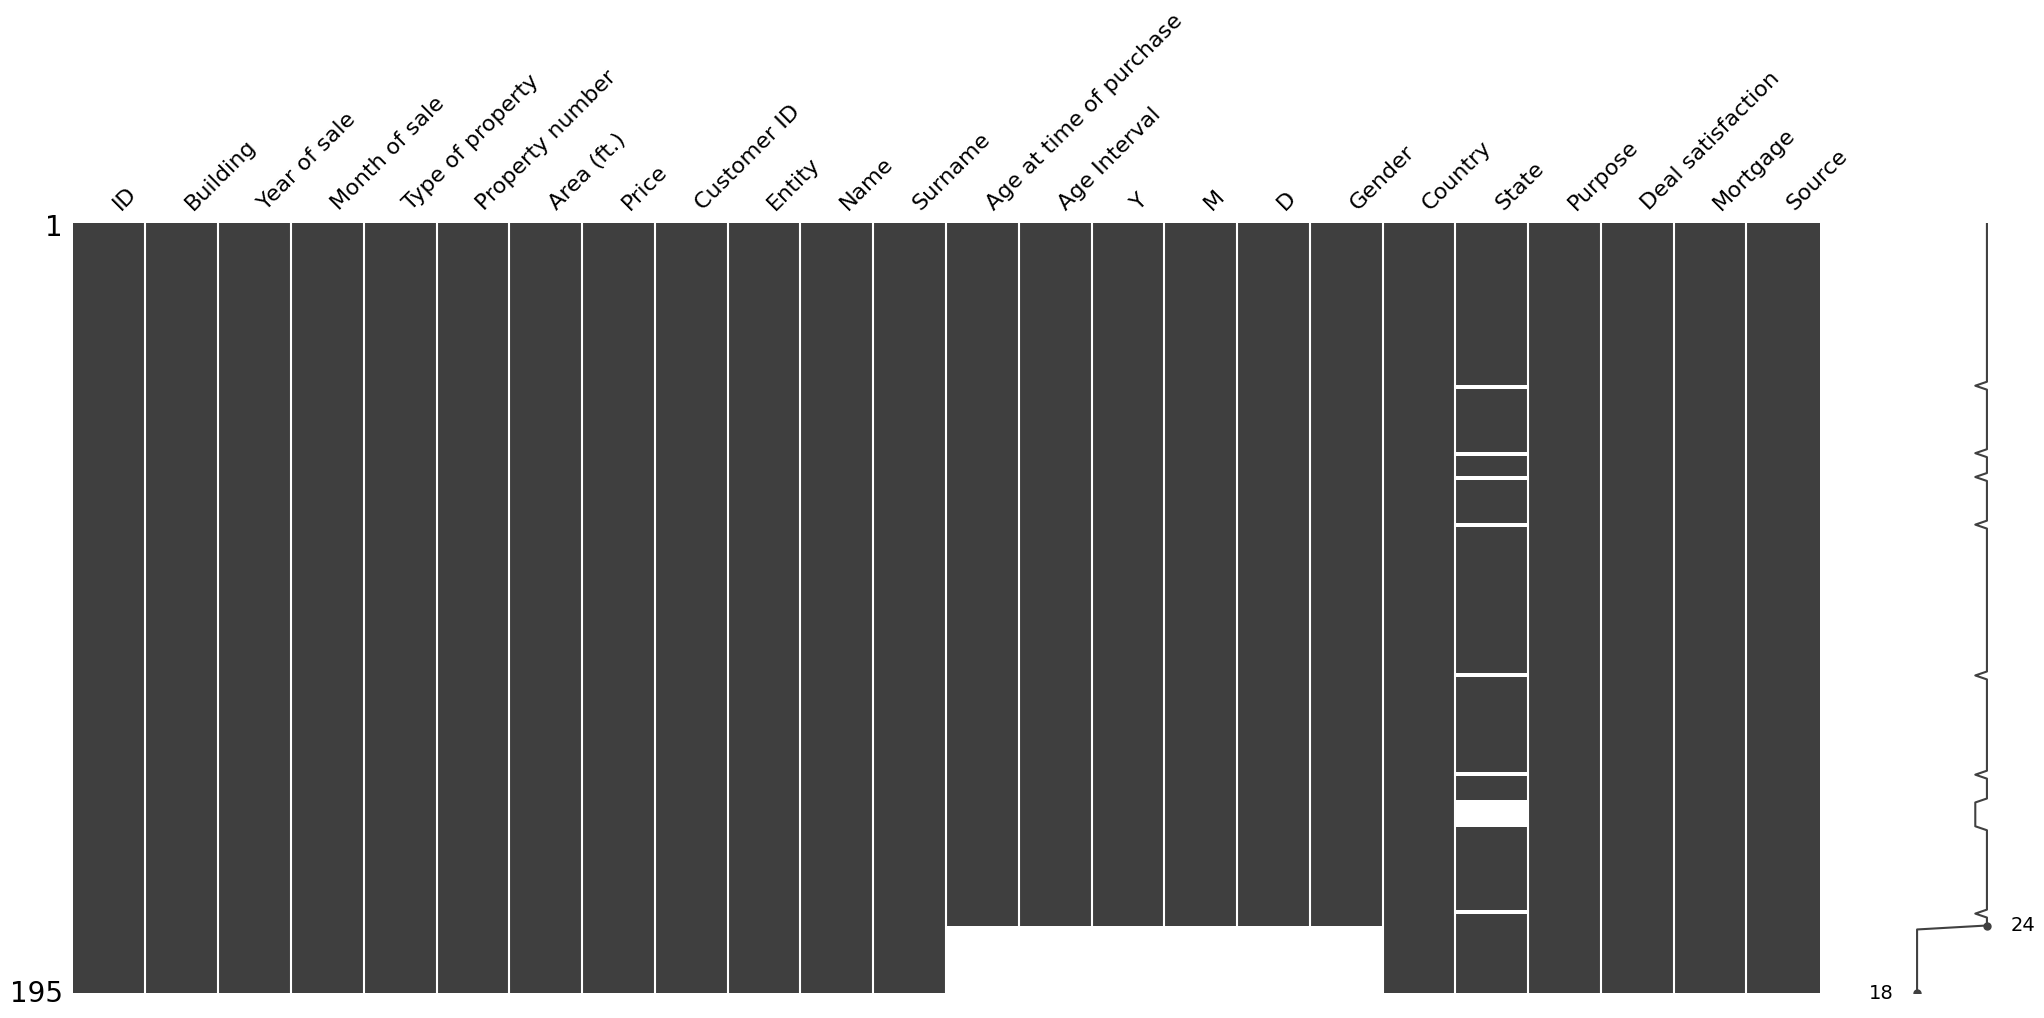

<Figure size 400x400 with 0 Axes>

In [111]:
msno.matrix(data)
plt.figure(figsize = (4,4))
plt.show()

In [112]:
data.loc[140]

ID                                   5050
Building                                5
Year of sale                         2007
Month of sale                          11
Type of property                Apartment
Property number                        50
Area (ft.)                         1093.0
Price                       $ 390,494.27 
Customer ID                         C0140
Entity                         Individual
Name                                Aniya
Surname                            Miller
Age at time of purchase              57.0
Age Interval                        56-65
Y                                  1950.0
M                                    15.0
D                                     2.0
Gender                                  F
Country                               USA
State                              Nevada
Purpose                              Home
Deal satisfaction                       3
Mortgage                               No
Source                            

In [113]:
data['M'] = data['M'].replace(15,3)

In [114]:
num_cols = [col for col in data.columns if data[col].dtype != 'object']
print(num_cols)

['ID', 'Building', 'Year of sale', 'Month of sale', 'Property number', 'Area (ft.)', 'Age at time of purchase', 'Y', 'M', 'D', 'Deal satisfaction']


In [115]:
knn = KNNImputer(n_neighbors=3)
X = knn.fit_transform(data[num_cols]).round(0)
data[num_cols] = pd.DataFrame(X, columns=num_cols)

In [116]:
data['Year of sale'] = pd.to_datetime({'Year':data['Year of sale'],'Month':data['Month of sale'],'Day':1})
data['Y'] = pd.to_datetime({'Year':data['Y'],'Month':data['M'],'Day':data['D']})
data.rename(columns={'Year of sale':'Sale date','Y':'Birthday','Age Interval ': 'Age Interval'},inplace= True)
data.drop(columns={'D','M','Month of sale'},axis=1,inplace= True)

In [117]:
data[data['Entity']=='Firm'][['Age at time of purchase','Sale date','Birthday','Age Interval','Gender']]

,Age at time of purchase,Sale date,Birthday,Age Interval,Gender
178,35.0,2004-03-01,1970-06-06,NaN,NaN
179,41.0,2004-11-01,1964-06-13,NaN,NaN
180,67.0,2004-11-01,1938-07-11,NaN,NaN
181,52.0,2005-09-01,1952-08-17,NaN,NaN
182,67.0,2005-12-01,1938-07-11,NaN,NaN
183,67.0,2005-12-01,1938-07-11,NaN,NaN
184,43.0,2006-10-01,1963-06-25,NaN,NaN
185,34.0,2004-03-01,1973-11-15,NaN,NaN
186,44.0,2005-07-01,1961-05-19,NaN,NaN
187,43.0,2005-07-01,1962-07-18,NaN,NaN


In [118]:
data['Age at time of purchase'] = data['Sale date'].dt.year - data['Birthday'].dt.year

In [119]:
data.loc[(data['Age Interval'].isnull()) & (data['Age at time of purchase'] >= 18) & (data['Age at time of purchase'] <= 25), 'Age Interval'] = '18-25'
data.loc[(data['Age Interval'].isnull()) & (data['Age at time of purchase'] >= 26) & (data['Age at time of purchase'] <= 35), 'Age Interval'] = '26-35'
data.loc[(data['Age Interval'].isnull()) & (data['Age at time of purchase'] >= 36) & (data['Age at time of purchase'] <= 45), 'Age Interval'] = '36-45'
data.loc[(data['Age Interval'].isnull()) & (data['Age at time of purchase'] >= 46) & (data['Age at time of purchase'] <= 55), 'Age Interval'] = '46-55'
data.loc[(data['Age Interval'].isnull()) & (data['Age at time of purchase'] >= 56) & (data['Age at time of purchase'] <= 65),'Age Interval'] = '56-65'
data.loc[(data['Age Interval'].isnull()) & (data['Age at time of purchase'] > 65),'Age Interval'] = '65+'

In [120]:
missing_columns = [col for col in data.columns if data[col].isnull().sum() > 0]
cat_missing_columns = [col for col in missing_columns if data[col].dtype =='object']
data[cat_missing_columns]=data[cat_missing_columns].fillna('Missing')

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       195 non-null    float64       
 1   Building                 195 non-null    float64       
 2   Sale date                195 non-null    datetime64[ns]
 3   Type of property         195 non-null    object        
 4   Property number          195 non-null    float64       
 5   Area (ft.)               195 non-null    float64       
 6   Price                    195 non-null    object        
 7   Customer ID              195 non-null    object        
 8   Entity                   195 non-null    object        
 9   Name                     195 non-null    object        
 10  Surname                  195 non-null    object        
 11  Age at time of purchase  195 non-null    int32         
 12  Age Interval             195 non-nul

In [122]:
get_numerical_summary(data)

{}

In [123]:
data.head()

,ID,Building,Sale date,Type of property,Property number,Area (ft.),Price,Customer ID,Entity,Name,Surname,Age at time of purchase,Age Interval,Birthday,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030.0,1.0,2005-11-01,Apartment,30.0,743.0,"$ 246,172.68",C0028,Individual,Madalyn,Mercer,19,18-25,1986-06-21,F,USA,California,Home,5.0,No,Website
1,1029.0,1.0,2005-10-01,Apartment,29.0,756.0,"$ 246,331.90",C0027,Individual,Lara,Carrillo,22,18-25,1983-02-24,F,USA,California,Home,5.0,No,Website
2,2002.0,2.0,2007-07-01,Apartment,2.0,587.0,"$ 209,280.91",C0112,Individual,Donavan,Flowers,22,18-25,1985-12-27,M,USA,California,Home,1.0,Yes,Client
3,2031.0,2.0,2007-12-01,Apartment,31.0,1605.0,"$ 452,667.01",C0160,Individual,Darien,Dorsey,22,18-25,1985-12-27,M,USA,California,Investment,3.0,Yes,Website
4,1049.0,1.0,2004-11-01,Apartment,49.0,1375.0,"$ 467,083.31",C0014,Individual,Alessandra,Perry,25,18-25,1979-05-15,F,USA,California,Home,4.0,No,Agency


In [124]:
data['Mortgage']=[True if col == 'Yes' else False for col in data['Mortgage']]

In [125]:
data['Price']=data['Price'].replace(r'[$,]','',regex=True).astype('float')
data['Country'] = data['Country'].replace(r'\s+','',regex= True)
data['Area (ft.)'] = data['Area (ft.)'].apply(lambda x: x/10.764).round(2)

In [126]:
data.rename(columns={'Area (ft.)': 'Area'}, inplace= True)

In [127]:
data[['Deal satisfaction','Building']] = data[['Deal satisfaction','Building']].astype('int8')
data[['ID','Property number']] = data[['ID','Property number']].astype('int64')

In [138]:
data.columns

Index(['ID', 'Building', 'Sale date', 'Type of property', 'Property number',
       'Area', 'Price', 'Customer ID', 'Entity', 'Name', 'Surname',
       'Age at time of purchase', 'Age Interval', 'Birthday', 'Gender',
       'Country', 'State', 'Purpose', 'Deal satisfaction', 'Mortgage',
       'Source'],
      dtype='object')

In [131]:
data.head()

,ID,Building,Sale date,Type of property,Property number,Area,Price,Customer ID,Entity,Name,Surname,Age at time of purchase,Age Interval,Birthday,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005-11-01,Apartment,30,69.03,246172.68,C0028,Individual,Madalyn,Mercer,19,18-25,1986-06-21,F,USA,California,Home,5,False,Website
1,1029,1,2005-10-01,Apartment,29,70.23,246331.90,C0027,Individual,Lara,Carrillo,22,18-25,1983-02-24,F,USA,California,Home,5,False,Website
2,2002,2,2007-07-01,Apartment,2,54.53,209280.91,C0112,Individual,Donavan,Flowers,22,18-25,1985-12-27,M,USA,California,Home,1,True,Client
3,2031,2,2007-12-01,Apartment,31,149.11,452667.01,C0160,Individual,Darien,Dorsey,22,18-25,1985-12-27,M,USA,California,Investment,3,True,Website
4,1049,1,2004-11-01,Apartment,49,127.74,467083.31,C0014,Individual,Alessandra,Perry,25,18-25,1979-05-15,F,USA,California,Home,4,False,Agency


<div align="center"> <font size="5"> <b>Data visualization</b> </div>

Text(0, 0.5, 'Count')

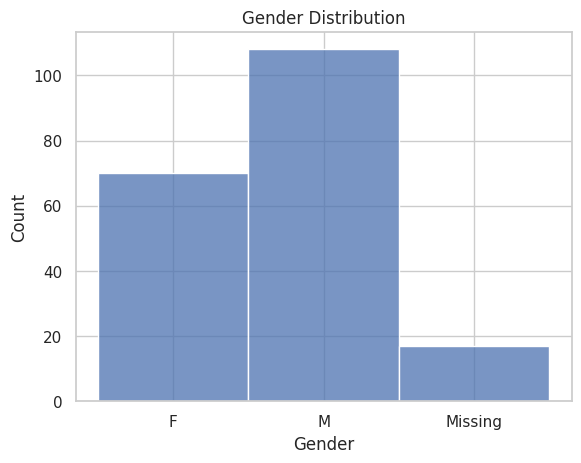

In [255]:
sns.set(style='whitegrid', context='notebook')

sns.histplot(data['Gender'])

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

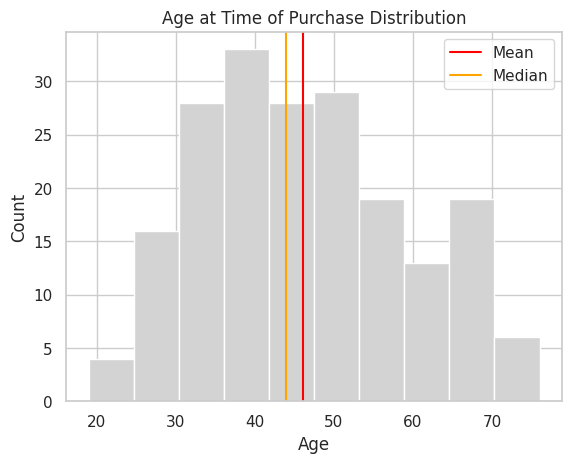

In [267]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(data['Age at time of purchase']), color='red',label = 'Mean')
plt.axvline(x = np.median(data['Age at time of purchase']), color='orange',label = 'Median')
_  = plt.hist(data['Age at time of purchase'],color='lightgray')

plt.title('Age at Time of Purchase Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.legend()

Text(0, 0.5, 'Count')

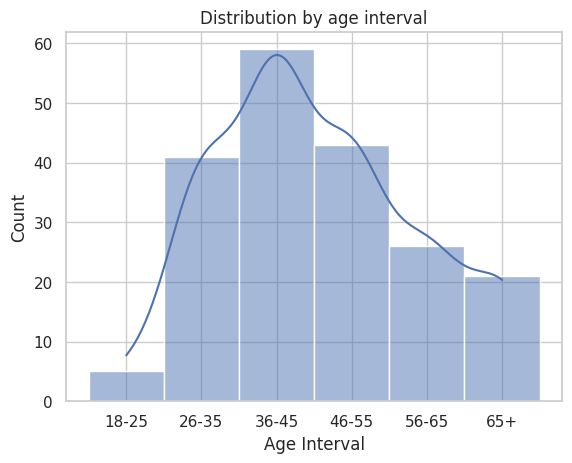

In [240]:
sns.set(style='whitegrid', context='notebook')

sns.histplot(data['Age Interval'], kde=True)

plt.title('Distribution by age interval')
plt.xlabel('Age Interval')
plt.ylabel('Count')

<Axes: >

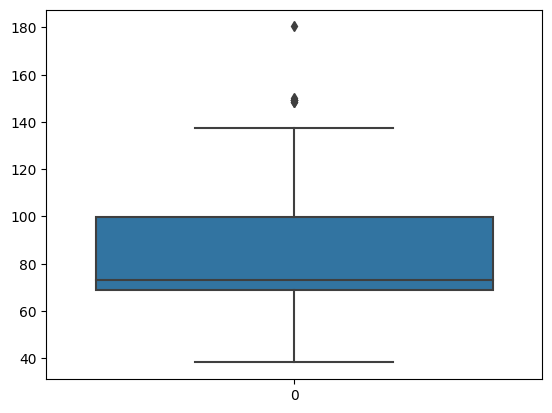

In [171]:
sns.boxplot(data = data['Area'])

<Axes: >

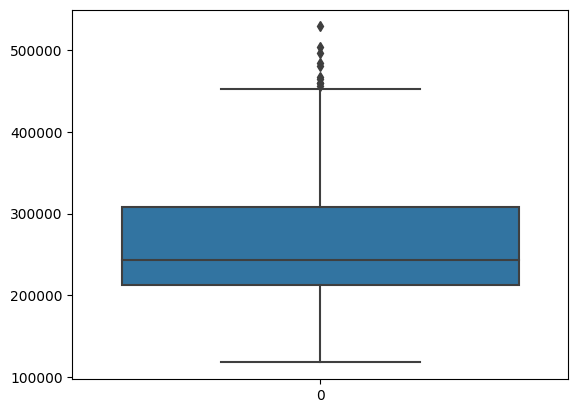

In [172]:
sns.boxplot(data = data['Price'])

Text(0.5, 0.98, 'Correlation between Area and Price')

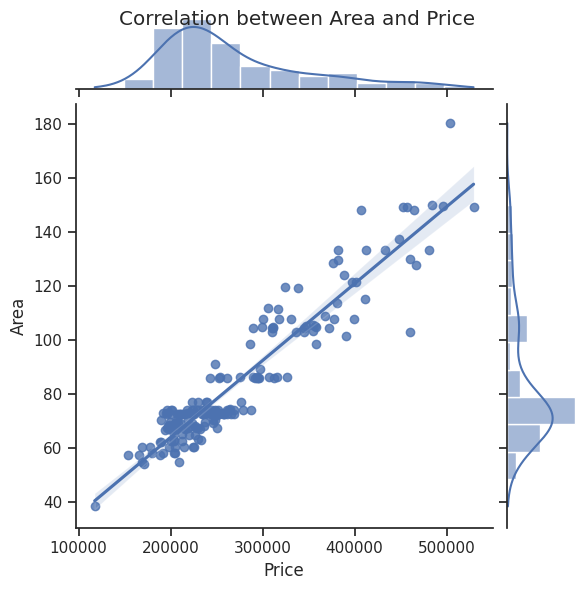

In [230]:
g = sns.jointplot(x='Price', y='Area', data=data, kind='reg')
g.fig.suptitle('Correlation between Area and Price')


In [178]:
print('Median price: {}\nMedian Area: {}'.format(data['Price'].median(),data['Area'].median()))

Median price: 243052.59
Median Area: 72.93


Text(0.5, 1.0, 'Purpose')

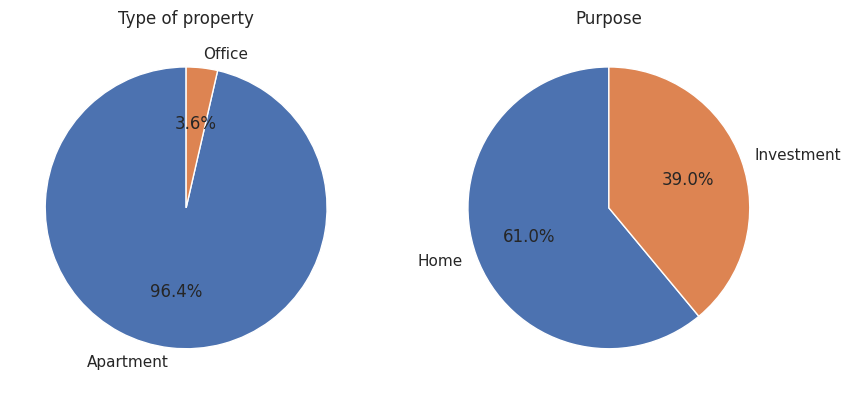

In [207]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(data['Type of property'].value_counts(), labels=data['Type of property'].value_counts().index, autopct='%1.1f%%', startangle=90)
axs[1].pie(data['Purpose'].value_counts(), labels=data['Purpose'].value_counts().index, autopct='%1.1f%%', startangle=90)

axs[0].set_title('Type of property')
axs[1].set_title('Purpose')

<Axes: xlabel='Count', ylabel='State'>

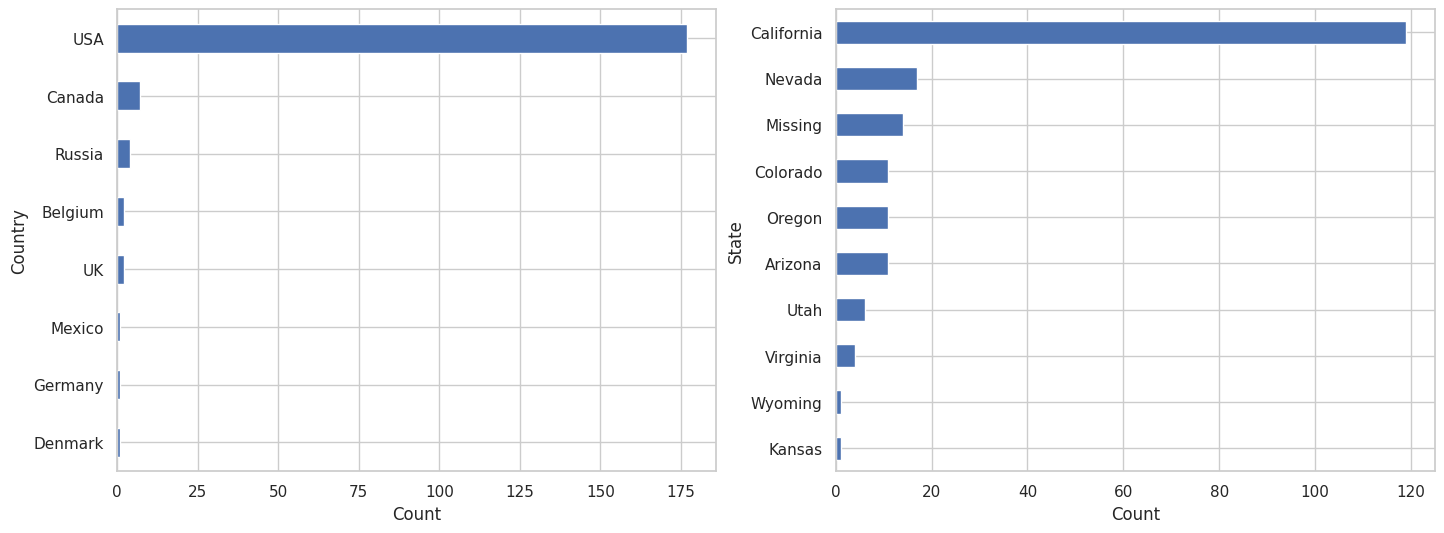

In [215]:
fig, axes = plt.subplots(1, 2, figsize=(17, 6))

data['Country'].value_counts(ascending=True).plot(kind='barh',xlabel='Count',ax=axes[0])
data['State'].value_counts(ascending=True).plot(kind='barh',xlabel='Count', ax=axes[1])


Text(0.5, 1.0, 'Source')

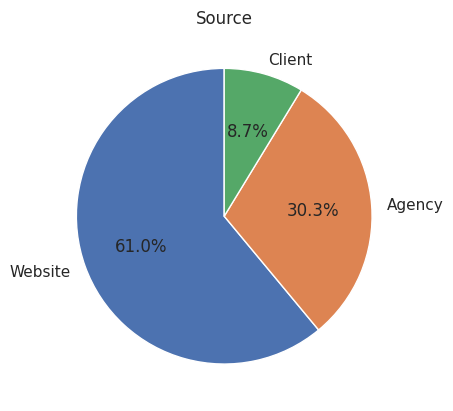

In [272]:
fig, ax = plt.subplots()

plt.pie(data['Source'].value_counts(), labels=data['Source'].value_counts().index, autopct='%1.1f%%', startangle=90)

plt.title('Source')

Text(0, 0.5, 'Number of users')

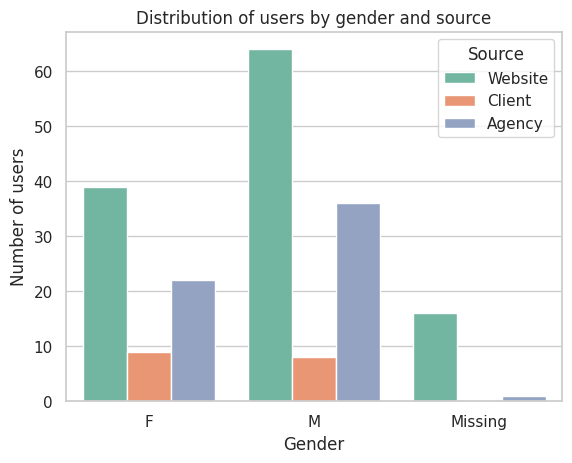

In [232]:
sns.set(style='whitegrid', context='notebook')
sns.countplot(data=data, x='Gender', hue='Source', palette='Set2')

plt.title('Distribution of users by gender and source')
plt.xlabel('Gender')
plt.ylabel('Number of users')

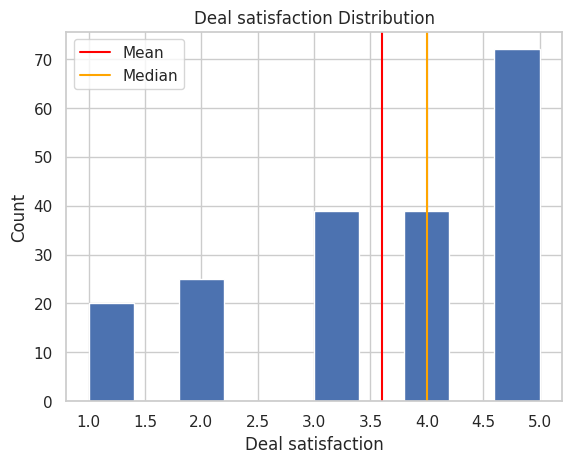

In [265]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(data['Deal satisfaction']), color='red',label = 'Mean')
plt.axvline(x = np.median(data['Deal satisfaction']), color='orange',label = 'Median')
_  = plt.hist(data['Deal satisfaction'])

plt.title('Deal satisfaction Distribution')
plt.xlabel('Deal satisfaction')
plt.ylabel('Count')

plt.legend()

In [250]:
data.columns

Index(['ID', 'Building', 'Sale date', 'Type of property', 'Property number',
       'Area', 'Price', 'Customer ID', 'Entity', 'Name', 'Surname',
       'Age at time of purchase', 'Age Interval', 'Birthday', 'Gender',
       'Country', 'State', 'Purpose', 'Deal satisfaction', 'Mortgage',
       'Source'],
      dtype='object')

<div align="center"> <font size="5"> <b>Conclusions</b> </div>